In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np
import math
import validate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import PR_curve

In [2]:
data_dir='fixed_csv_label_ver2'
df = pd.read_csv( os.path.join(data_dir, 'learning_data_10.csv') )
df=df[df['day']<=9]
df

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
3995345,45.9,0,5,9
3995346,45.6,0,5,9
3995347,45.8,0,5,9
3995348,45.7,0,5,9


In [3]:
def make_data(x, str,w):
    x=pd.DataFrame(x)
    window=w
    for i in range(1, window):
        column=f'{str}_lag{i}'
        x[column]=x[str].shift(i)
    return x

def make_label(x, w):
    window=w
    x['label_all']=x['label']
    for i in range(1, window):
        x.loc[(x['label_all']==1)|(x['label'].shift(i)==1), 'label_all']=1
        x.loc[(x['label_all']==0)&(x['label'].shift(i)==0), 'label_all']=0
    
    x['label']=x['label_all']
    return x[['label']]

df_list=[]
for i in set(df['day']):
    lag=[] 
    window=20
    lag.append(make_data(df.loc[df['day']==i, ['original']], 'original', window))
    lag.append(df.loc[df['day']==i, ['day']])
    lag.append(make_label(df.loc[df['day']==i, ['label']], window))
    df_add_lag=pd.concat(lag, axis=1)
    df_list.append(df_add_lag)
df=pd.concat(df_list)
df=df.dropna().reset_index(drop=True)
df

,original,original_lag1,original_lag2,original_lag3,original_lag4,original_lag5,original_lag6,original_lag7,original_lag8,original_lag9,...,original_lag12,original_lag13,original_lag14,original_lag15,original_lag16,original_lag17,original_lag18,original_lag19,day,label
0,55.2,55.0,55.0,54.9,54.9,54.9,55.0,55.7,55.8,55.6,...,55.7,54.7,54.0,53.6,53.2,52.8,52.8,53.4,0,0
1,54.7,55.2,55.0,55.0,54.9,54.9,54.9,55.0,55.7,55.8,...,55.5,55.7,54.7,54.0,53.6,53.2,52.8,52.8,0,0
2,54.4,54.7,55.2,55.0,55.0,54.9,54.9,54.9,55.0,55.7,...,55.7,55.5,55.7,54.7,54.0,53.6,53.2,52.8,0,0
3,54.5,54.4,54.7,55.2,55.0,55.0,54.9,54.9,54.9,55.0,...,55.6,55.7,55.5,55.7,54.7,54.0,53.6,53.2,0,0
4,54.3,54.5,54.4,54.7,55.2,55.0,55.0,54.9,54.9,54.9,...,55.8,55.6,55.7,55.5,55.7,54.7,54.0,53.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995155,45.9,45.6,45.4,45.9,46.0,45.7,45.4,45.5,45.8,45.9,...,45.7,45.7,45.4,45.5,45.6,45.6,45.6,45.3,9,0
3995156,45.6,45.9,45.6,45.4,45.9,46.0,45.7,45.4,45.5,45.8,...,45.8,45.7,45.7,45.4,45.5,45.6,45.6,45.6,9,0
3995157,45.8,45.6,45.9,45.6,45.4,45.9,46.0,45.7,45.4,45.5,...,45.4,45.8,45.7,45.7,45.4,45.5,45.6,45.6,9,0
3995158,45.7,45.8,45.6,45.9,45.6,45.4,45.9,46.0,45.7,45.4,...,45.9,45.4,45.8,45.7,45.7,45.4,45.5,45.6,9,0


# PR曲線

## 閾値決定

0日目


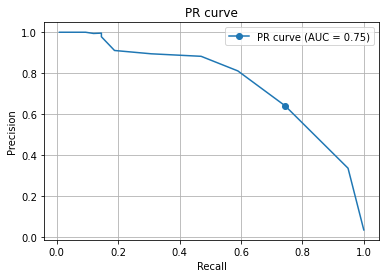

AUC：0.7515911535230582
閾値：0.10615618577091256
F値：0.6881532119722457
適合率：0.6404090657822001
再現率：0.7435897435897436
-----------------------------------------------------------------------
1日目


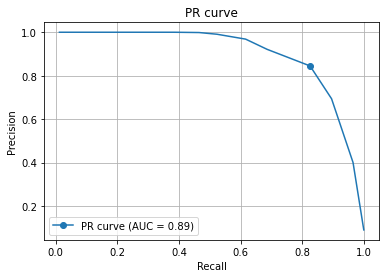

AUC：0.8919131626576862
閾値：0.15949848422405882
F値：0.8350936149783966
適合率：0.8448275862068966
再現率：0.8255813953488372
-----------------------------------------------------------------------
2日目


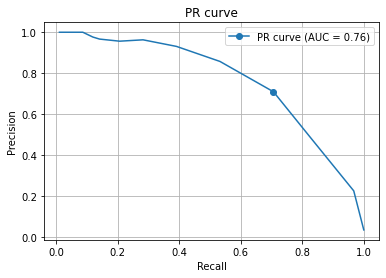

AUC：0.7570502997552362
閾値：0.15897313973189547
F値：0.7080888465744258
適合率：0.7096629213483147
再現率：0.7065217391304348
-----------------------------------------------------------------------
3日目


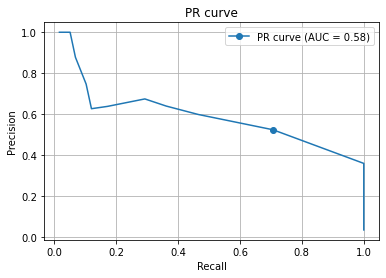

AUC：0.5760757708060005
閾値：0.10614225169536358
F値：0.6012904106783191
適合率：0.5231368728689723
再現率：0.7068965517241379
-----------------------------------------------------------------------
4日目


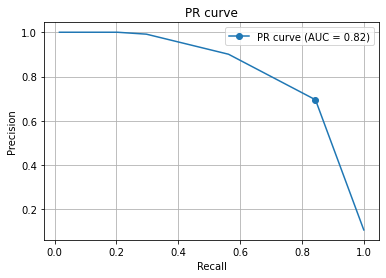

AUC：0.8192195058172745
閾値：0.053126126452806975
F値：0.7622203059047793
適合率：0.6950583560963497
再現率：0.84375
-----------------------------------------------------------------------
5日目


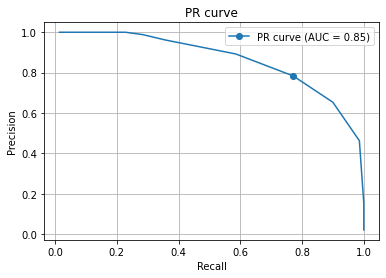

AUC：0.8527713288061035
閾値：0.21160034482098022
F値：0.7774542872359311
適合率：0.7835748792270532
再現率：0.7714285714285715
-----------------------------------------------------------------------
6日目


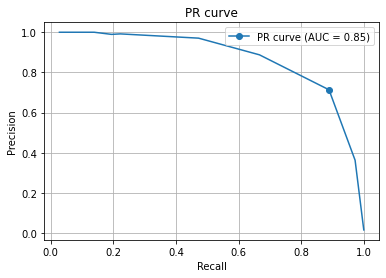

AUC：0.8478026378521406
閾値：0.10597600963552611
F値：0.7915316483041693
適合率：0.7133956386292835
再現率：0.8888888888888888
-----------------------------------------------------------------------
7日目


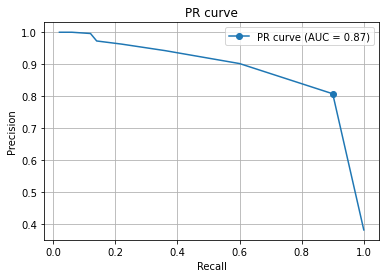

AUC：0.867757614265231
閾値：0.05347399349217664
F値：0.8514103770810048
適合率：0.8077985683787517
再現率：0.9
-----------------------------------------------------------------------
8日目


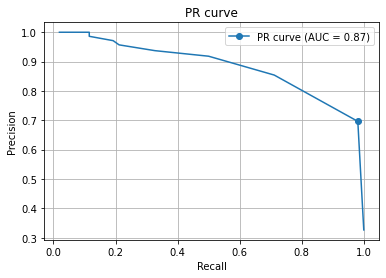

AUC：0.8658562282849939
閾値：0.05387811282910667
F値：0.8144343251722059
適合率：0.6963379359275228
再現率：0.9807692307692307
-----------------------------------------------------------------------
9日目


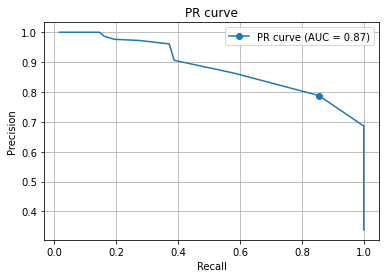

AUC：0.8684488309393343
閾値：0.1065817718674149
F値：0.820094775940771
適合率：0.7880647911338449
再現率：0.8548387096774194
-----------------------------------------------------------------------


In [4]:
thr_list=[]
original = pd.read_csv( os.path.join(data_dir, 'learning_data_10.csv') )
for i in set(df['day']):
    print(f'{i}日目')
    
    test_day=[i]
    train=df[(df['label']==0)&(~df['day'].isin(test_day))].reset_index(drop=True)
    test=df[(df['day'].isin(test_day))].reset_index(drop=True)
    
    ##主成分分析（次元削減）
    #訓練データ
    pca_step_minute=30
    pca_step_data_num=int((pca_step_minute*60)/0.2)
    train_df_list=[]
    for i in range(int(len(train)/pca_step_data_num)+1):
        train_pca=PCA(n_components=4)
        train_pca.fit(train.iloc[i*pca_step_data_num:(i+1)*pca_step_data_num][train.columns[:-2]])
        train_data=train_pca.transform(train.iloc[i*pca_step_data_num:(i+1)*pca_step_data_num][train.columns[:-2]])
        tmp=pd.DataFrame(train_data)
        train_df_list.append(tmp)
    train=pd.concat(train_df_list).reset_index(drop=True)
    
    ##主成分分析（次元削減）
    #テストデータ
    pca_step_minute=30
    pca_step_data_num=int((pca_step_minute*60)/0.2)
    test_df_list=[]
    for i in range(int(len(test)/pca_step_data_num)+1):
        test_pca=PCA(n_components=4)
        test_pca.fit(test.iloc[i*pca_step_data_num:(i+1)*pca_step_data_num][test.columns[:-2]])
        test_data=test_pca.transform(test.iloc[i*pca_step_data_num:(i+1)*pca_step_data_num][test.columns[:-2]])
        tmp=pd.DataFrame(test_data)
        test_df_list.append(tmp)
    test=pd.concat(test_df_list).reset_index(drop=True)
    
    nk = 10
    neigh = NearestNeighbors(n_neighbors=nk)
    neigh.fit(train)
    d = neigh.kneighbors(test)[0]
    d = np.mean(d, axis=1)
    mx = np.max(d)
    d = d / mx
    
    test_v=original[original['day'].isin(test_day)][['original', 'label']].reset_index(drop=True)
    test_v['d']=d[0]
    test_v.loc[window-1:, 'd']=d
    
    d=test_v['d'].values
    thr_bins=20
    p_score, r_score, f_score, thresholds, thr, auc = PR_curve.fig_pr(test_v, d, thr_bins)
    print(f'AUC：{auc}')
    print(f'閾値：{thr}')
    print(f'F値：{f_score.max()}')
    print(f'適合率：{p_score[np.argmax(f_score)]}')
    print(f'再現率：{r_score[np.argmax(f_score)]}')
    thr_list.append(thr)
    print('-----------------------------------------------------------------------')

In [5]:
thr_df=pd.DataFrame({'day':df['day'].unique(), 
                    'thr':thr_list})
thr_df.to_csv('day_thr_pca.csv', index=False)

In [6]:
thr_df

,day,thr
0,0,0.106156
1,1,0.159498
2,2,0.158973
3,3,0.106142
4,4,0.053126
5,5,0.211600
6,6,0.105976
7,7,0.053474
8,8,0.053878
9,9,0.106582
